1. Es necesario utilizar unicamente los puntos sobre la esfera
que tengan todas sus puntos positivos. Esto porque sino
se obtienen rankings inversos.
2. No hay relacion entre el poset interseccion,
calculado usando los rankings de las puntuaciones,
con el __poset de puntos__
__poset de puntos__ poset que se obtiene al comparar
todas las entradas del vector que representa un nodo.
3. Es necesario mejorar la normalizacion
4. Los 1s del poset de puntos, siempre aparecen en el
poset borroso, calculado utilizando las puntuaciones.

In [3]:
import Distributions: MvNormal

In [4]:
using Posets

In [5]:
using Distributions
using Plots
using LinearAlgebra

using DelimitedFiles

In [6]:
using SparseArrays

# Metodos

In [7]:
function metametodo(metodo, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x]#=, rev = true=#) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    [energia_local(r, poset) for r in ranks]
end

metametodo (generic function with 1 method)

In [8]:
corte0p70 = x -> αcut_poset(x |>fuzzy, 0.70)
corte0p80 = x -> αcut_poset(x |>fuzzy, 0.80)
corte0p90 = x -> αcut_poset(x |>fuzzy, 0.90)
corte0p95 = x -> αcut_poset(x |>fuzzy, 0.95)
corte0p98 = x -> αcut_poset(x |>fuzzy, 0.98)

#19 (generic function with 1 method)

In [9]:
metodom2 = x -> x |> m2 |> pareja_matrizadyacencia
metodom3 = x -> x |> m3 |> pareja_matrizadyacencia
condorcet = x ->  αcut_poset(matriz_union_rankings(x;binario=false,promediado=true), .5)

#25 (generic function with 1 method)

# Datos
## Datos iniciales


In [10]:
posetdepuntos, puntuaciones = generapuntuaciones_gaussian(20,7,3);

## Calculos

In [12]:
cortes = map(metodo -> metametodo(metodo, puntuaciones, true), [corte0p70, corte0p80, corte0p90, corte0p95, corte0p98])
metodosM = map(metodo -> metametodo(metodo, puntuaciones, true), [metodom2, metodom3])
metodosrankings = map(metodo -> metametodo(metodo, puntuaciones, false), [condorcet, matriz_interseccion_rankings])

2-element Array{Array{Int64,1},1}:
 [0, 1, 3, 1, 2, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Presentacion datos

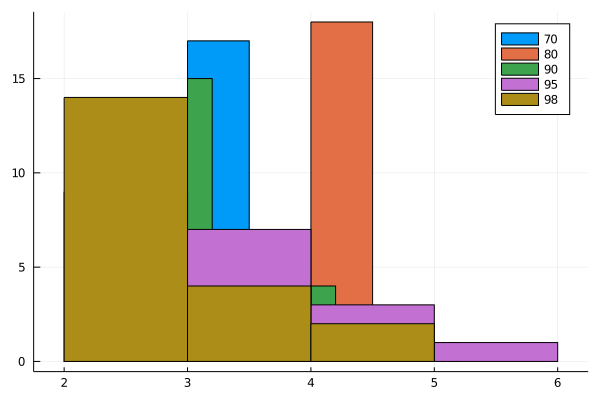

In [13]:
histogram(cortes, labels= [70 80 90 95 98])


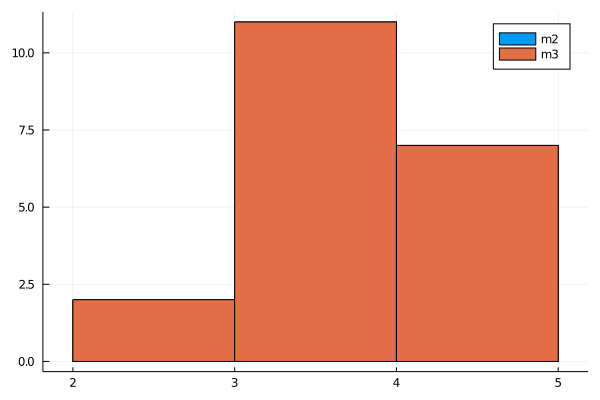

In [14]:
histogram(metodosM,labels = ["m2" "m3"])


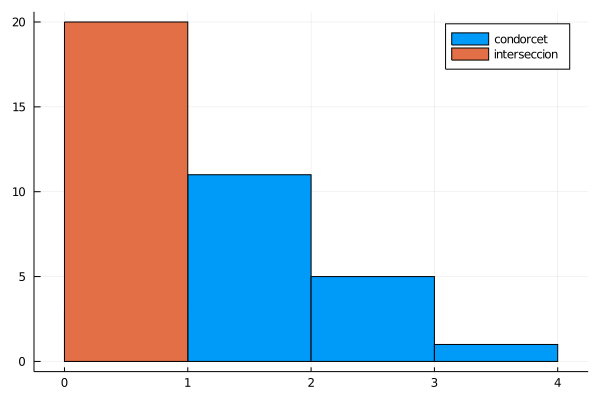

In [15]:
histogram(metodosrankings,labels = ["condorcet" "interseccion"])


# Conclusiones